<a href="https://colab.research.google.com/github/TorshaPathak/Data-Science-Projects/blob/main/Linear_Regression_Bike_Sharing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading a CSV file named "data.csv" located in the "Data" folder on the your Google Drive and stores it as a DataFrame df
# write your data file path
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BikeIndia.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df['weathersit'].value_counts()

,count
weathersit,
1,463
2,246
3,21


In [ ]:
df['weekday'].value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [ ]:
df['mnth'].value_counts()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [ ]:
df['weekday'].value_counts()


,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [ ]:
categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

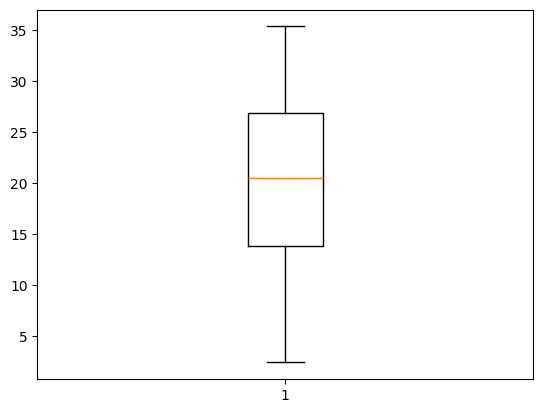

In [ ]:
plt.boxplot (df['temp'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7afd838b3310>,
 'caps': [<matplotlib.lines.Line2D at 0x7afd838b8c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afd838b26d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7afd838ba490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afd838baf90>],
 'means': []}

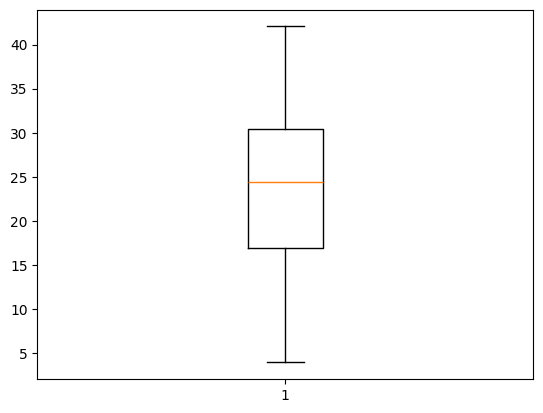

In [ ]:
plt.boxplot (df['atemp'])

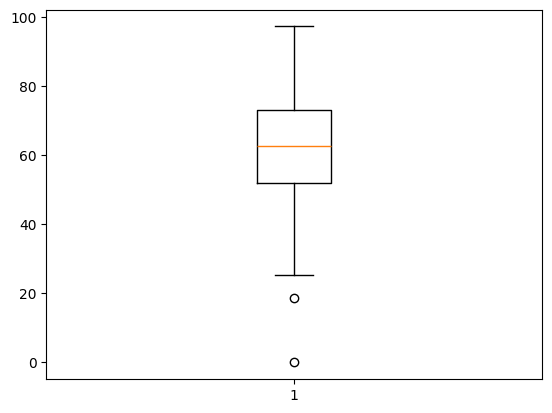

In [ ]:
plt.boxplot (df['hum'])
plt.show()

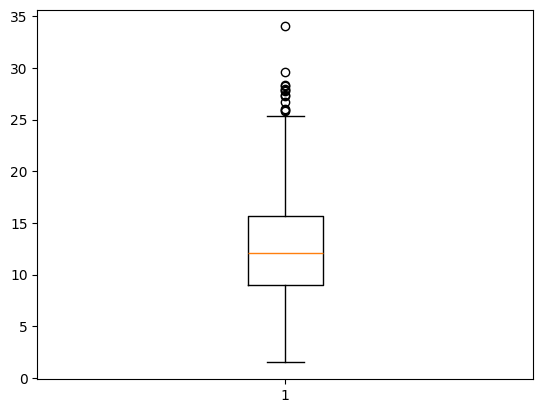

In [ ]:
plt.boxplot (df['windspeed'])
plt.show()

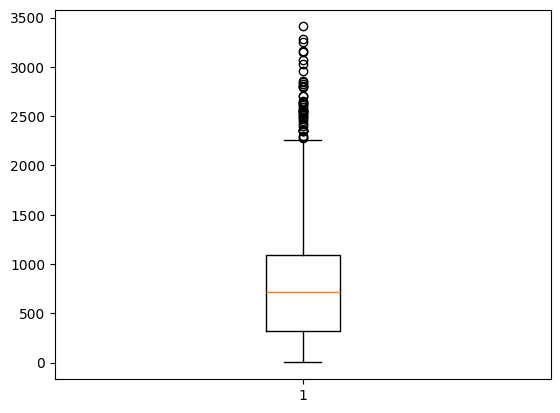

In [ ]:
plt.boxplot (df['casual'])
plt.show()

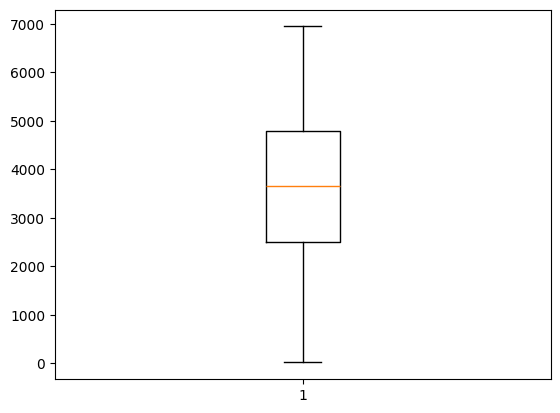

In [ ]:
plt.boxplot (df['registered'])
plt.show()

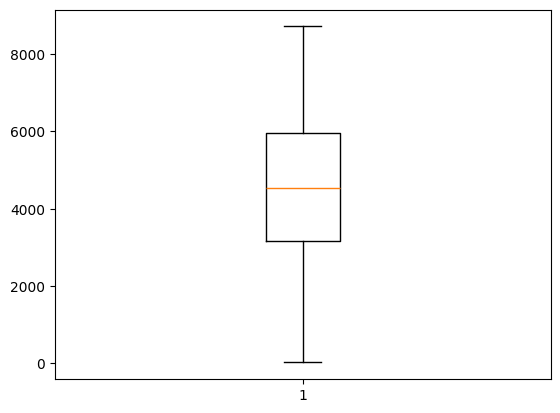

In [ ]:
plt.boxplot (df['cnt'])
plt.show()

<Axes: >

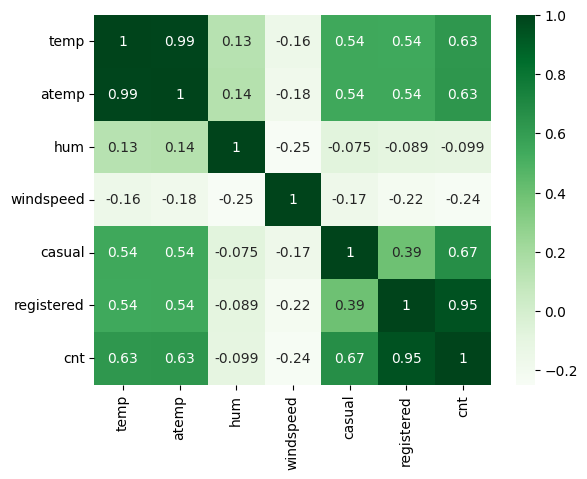

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True, cmap = 'Greens')

In [ ]:
df_lr = df.copy()

In [ ]:
df.drop(['atemp', 'registered'], axis = 1, inplace = True)


In [ ]:
df.shape

(730, 14)

In [ ]:
outlier_removal = ['windspeed', 'casual', 'hum']

###IQR Mathod for outlier removal

for i in outlier_removal:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  IQR = q3-q1

  l = q1-1.5*IQR
  u = q3+1.5*IQR

  df_filtered = df[(df[i]>=l) & (df[i]<=u)]



{'whiskers': [<matplotlib.lines.Line2D at 0x7afd85a69cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7afd85a6b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afd85a69090>],
 'medians': [<matplotlib.lines.Line2D at 0x7afd85a70b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afd85a71710>],
 'means': []}

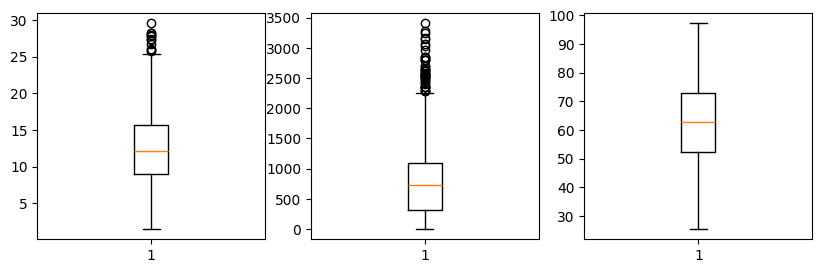

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(331)
plt.boxplot(df_filtered['windspeed'])
plt.subplot(332)
plt.boxplot(df_filtered['casual'])
plt.subplot(333)
plt.boxplot(df_filtered['hum'])


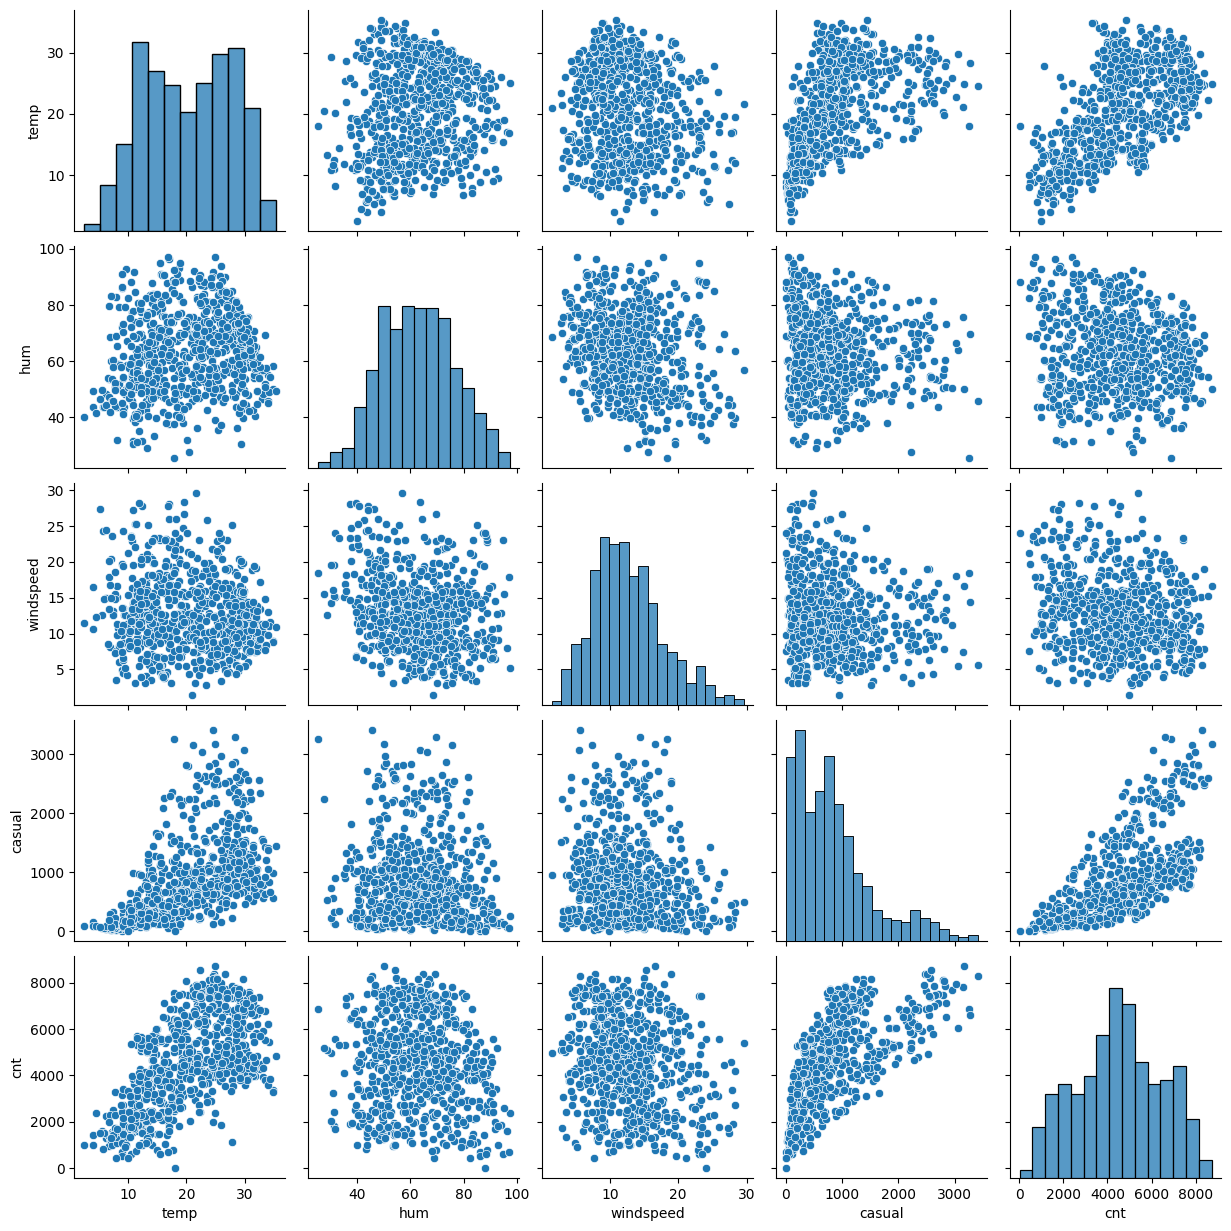

In [ ]:
sns.pairplot(df_filtered[['temp',  'hum', 'windspeed', 'casual', 'cnt']])
plt.show()

In [ ]:
### categorical data analysis

In [ ]:
categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

<Axes: xlabel='weathersit', ylabel='cnt'>

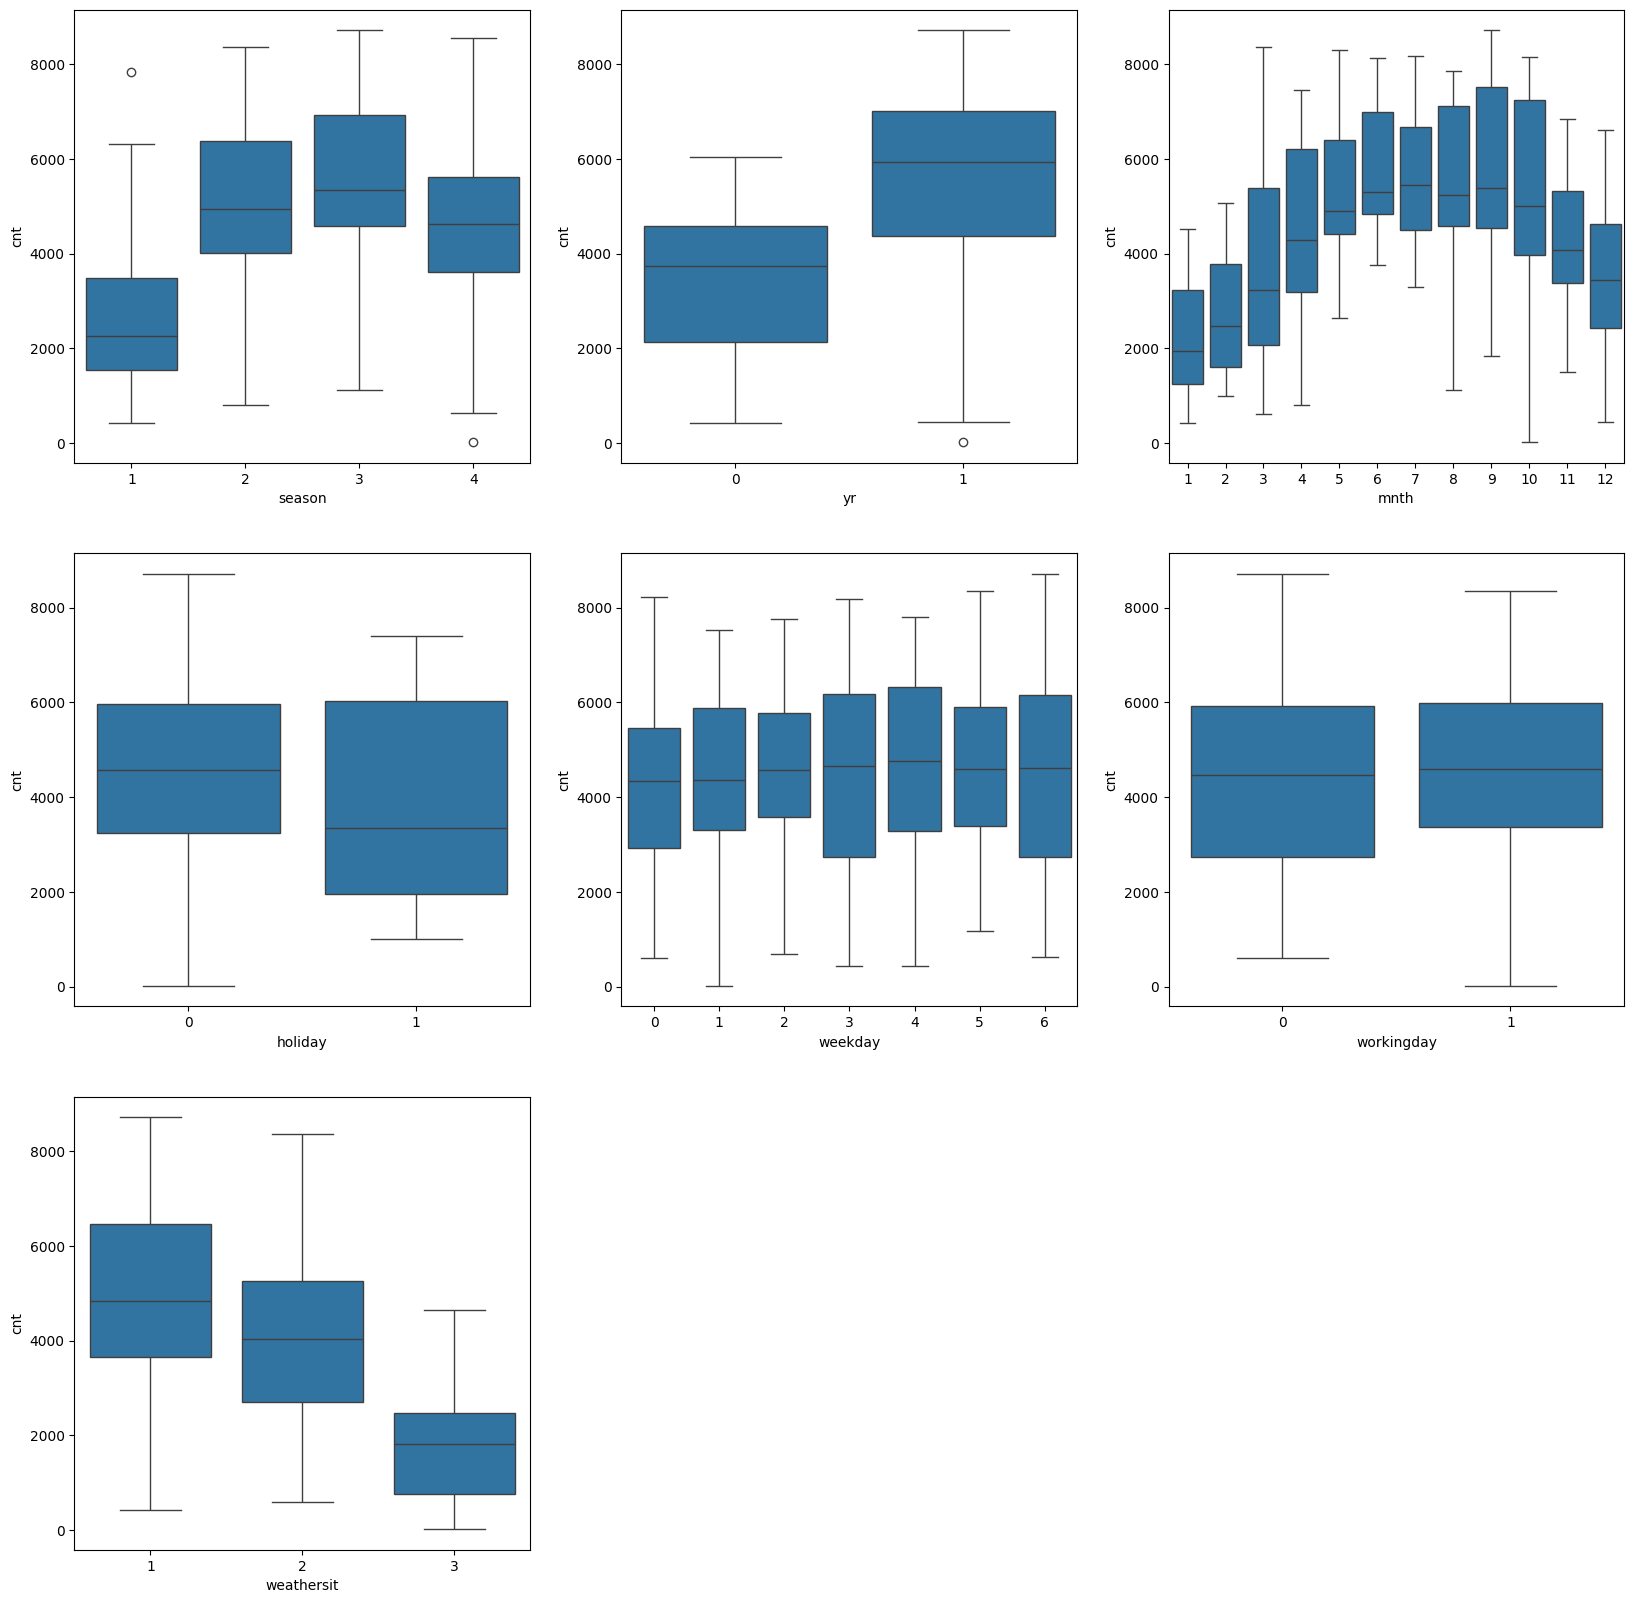

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(331)
sns.boxplot(x = categorical[0], y = 'cnt', data = df_filtered)
plt.subplot (332)
sns.boxplot(x = categorical[1], y = 'cnt', data = df_filtered)
plt.subplot (333)
sns.boxplot(x = categorical[2], y = 'cnt', data = df_filtered)
plt.subplot (334)
sns.boxplot(x = categorical[3], y = 'cnt', data = df_filtered)
plt.subplot (335)
sns.boxplot(x = categorical[4], y = 'cnt', data = df_filtered)
plt.subplot (336)
sns.boxplot(x = categorical[5], y = 'cnt', data = df_filtered)
plt.subplot (337)
sns.boxplot(x = categorical[6], y = 'cnt', data = df_filtered)

In [ ]:
###Feature engineering

In [ ]:
df_new = pd.get_dummies(df_filtered[categorical], drop_first = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   season      728 non-null    int64
 1   yr          728 non-null    int64
 2   mnth        728 non-null    int64
 3   holiday     728 non-null    int64
 4   weekday     728 non-null    int64
 5   workingday  728 non-null    int64
 6   weathersit  728 non-null    int64
dtypes: int64(7)
memory usage: 45.5 KB


In [ ]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


In [ ]:
## categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_filtered['season'] = df_filtered['season'].astype('category')
df_filtered['yr'] = df_filtered['yr'].astype('category')
df_filtered['mnth'] = df_filtered['mnth'].astype('category')
df_filtered['holiday'] = df_filtered['holiday'].astype('category')
df_filtered['weekday'] = df_filtered['weekday'].astype('category')
df_filtered['workingday'] = df_filtered['workingday'].astype('category')
df_filtered['weathersit'] = df_filtered['weathersit'].astype('category')

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     728 non-null    int64   
 1   dteday      728 non-null    object  
 2   season      728 non-null    category
 3   yr          728 non-null    category
 4   mnth        728 non-null    category
 5   holiday     728 non-null    category
 6   weekday     728 non-null    category
 7   workingday  728 non-null    category
 8   weathersit  728 non-null    category
 9   temp        728 non-null    float64 
 10  hum         728 non-null    float64 
 11  windspeed   728 non-null    float64 
 12  casual      728 non-null    int64   
 13  cnt         728 non-null    int64   
dtypes: category(7), float64(3), int64(3), object(1)
memory usage: 51.9+ KB


In [ ]:
df_new = pd.get_dummies(df_filtered, columns = categorical, drop_first = True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 729
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       728 non-null    int64  
 1   dteday        728 non-null    object 
 2   temp          728 non-null    float64
 3   hum           728 non-null    float64
 4   windspeed     728 non-null    float64
 5   casual        728 non-null    int64  
 6   cnt           728 non-null    int64  
 7   season_2      728 non-null    bool   
 8   season_3      728 non-null    bool   
 9   season_4      728 non-null    bool   
 10  yr_1          728 non-null    bool   
 11  mnth_2        728 non-null    bool   
 12  mnth_3        728 non-null    bool   
 13  mnth_4        728 non-null    bool   
 14  mnth_5        728 non-null    bool   
 15  mnth_6        728 non-null    bool   
 16  mnth_7        728 non-null    bool   
 17  mnth_8        728 non-null    bool   
 18  mnth_9        728 non-null    bool 

In [ ]:
df_new.head()

,instant,dteday,temp,hum,windspeed,casual,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,01-01-2018,14.110847,80.5833,10.749882,331,985,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,2,02-01-2018,14.902598,69.6087,16.652113,131,801,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,03-01-2018,8.050924,43.7273,16.636703,120,1349,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,4,04-01-2018,8.200000,59.0435,10.739832,108,1562,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,5,05-01-2018,9.305237,43.6957,12.522300,82,1600,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
df_new.drop(['instant', 'dteday'], axis=1, inplace = True)
df_new.shape

(728, 30)

In [ ]:
col = df_new.select_dtypes ( include = ['bool']).columns

In [ ]:
map_col = {True : 1, False : 0}
for i in col:
  df_new[i] = df_new[i].map(map_col)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          728 non-null    float64
 1   hum           728 non-null    float64
 2   windspeed     728 non-null    float64
 3   casual        728 non-null    int64  
 4   cnt           728 non-null    int64  
 5   season_2      728 non-null    int64  
 6   season_3      728 non-null    int64  
 7   season_4      728 non-null    int64  
 8   yr_1          728 non-null    int64  
 9   mnth_2        728 non-null    int64  
 10  mnth_3        728 non-null    int64  
 11  mnth_4        728 non-null    int64  
 12  mnth_5        728 non-null    int64  
 13  mnth_6        728 non-null    int64  
 14  mnth_7        728 non-null    int64  
 15  mnth_8        728 non-null    int64  
 16  mnth_9        728 non-null    int64  
 17  mnth_10       728 non-null    int64  
 18  mnth_11       728 non-null    int64

In [ ]:
col

Index(['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

<Axes: >

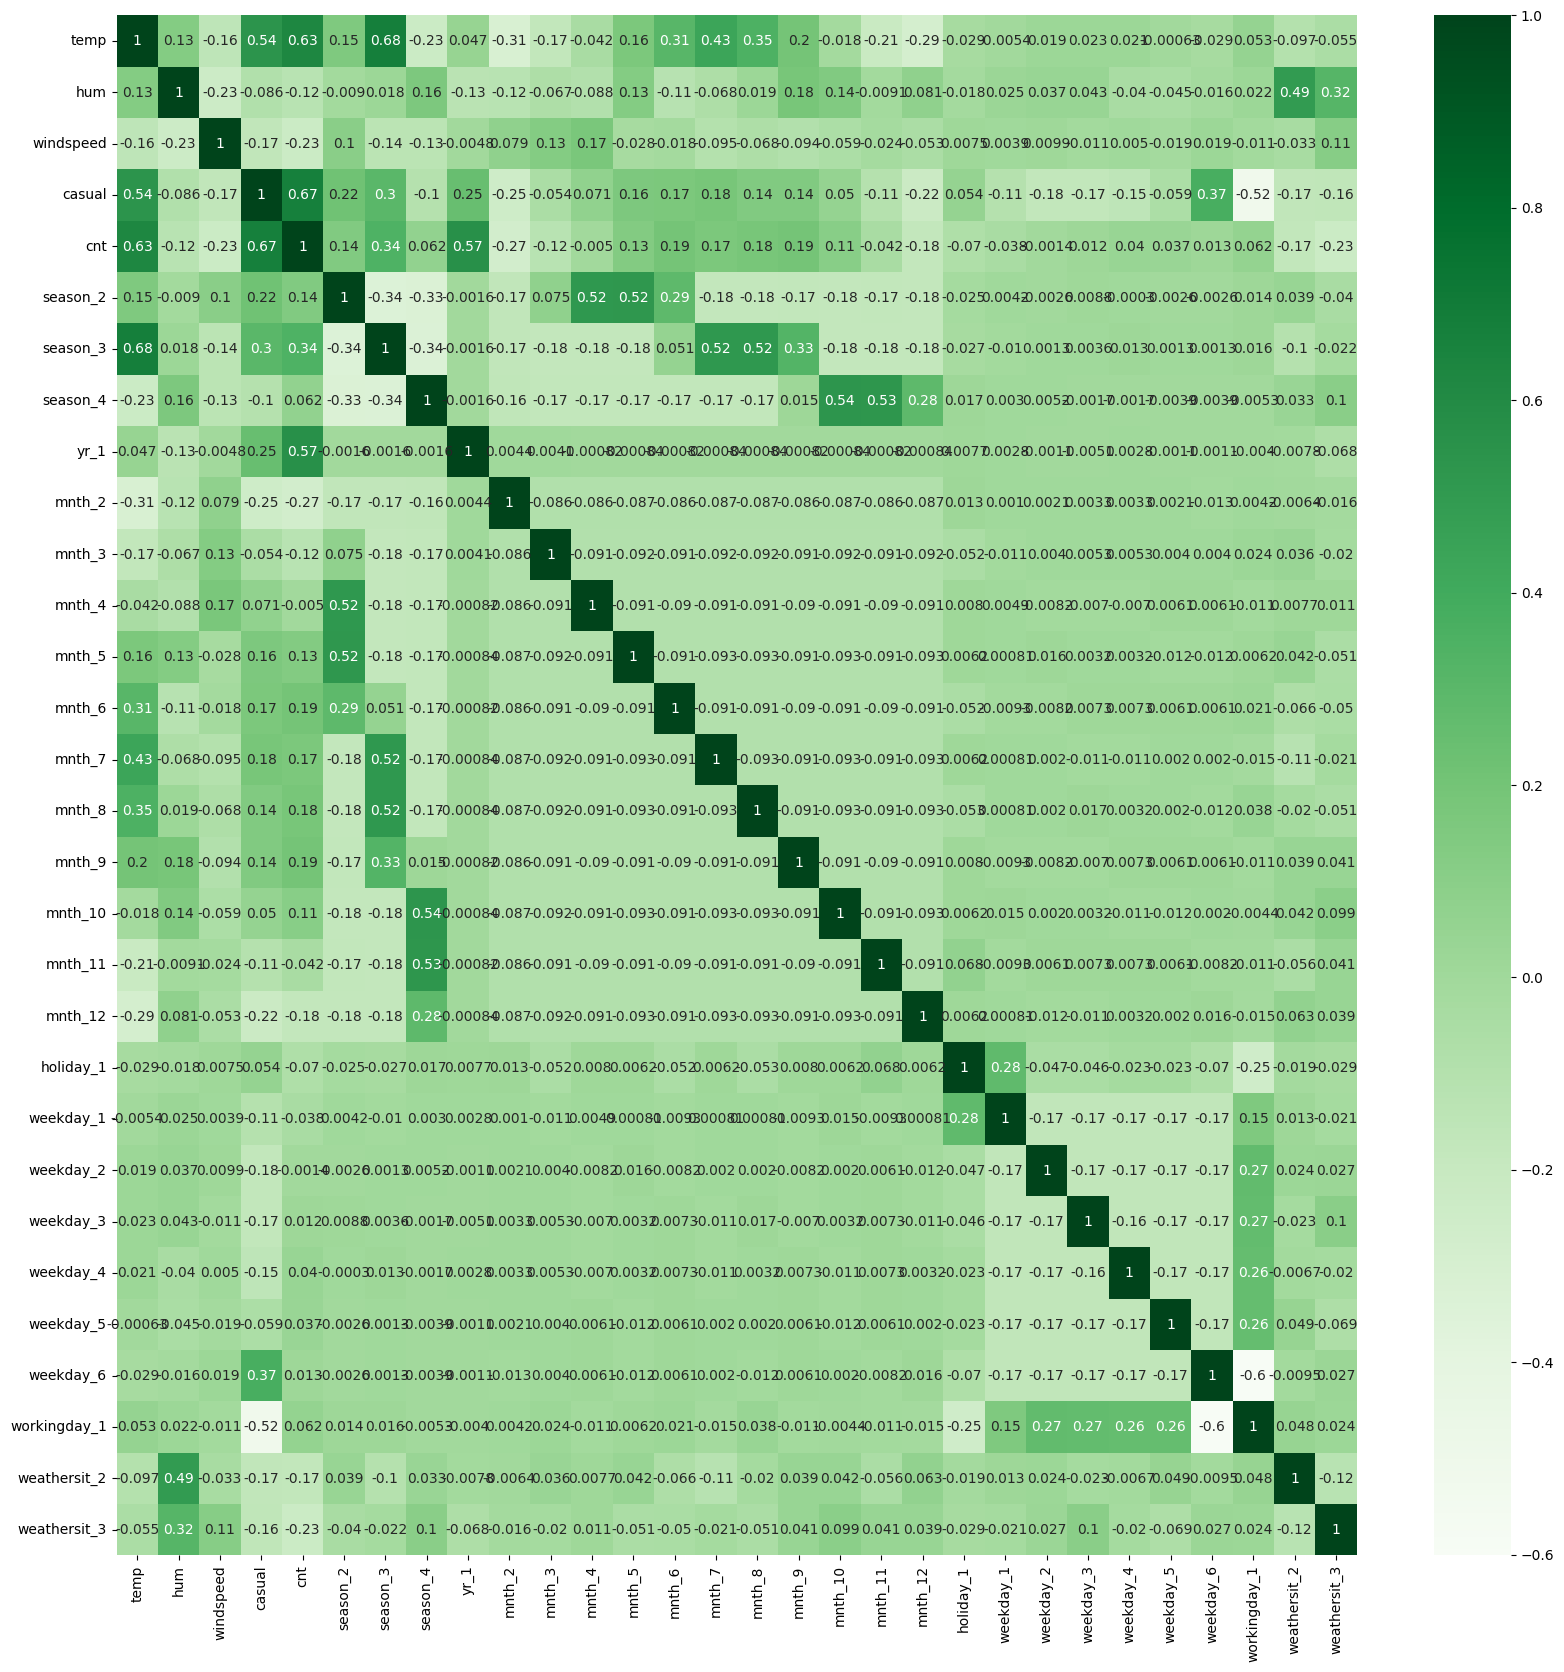

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df_new.corr(), annot = True, cmap = 'Greens')

In [ ]:
#### Model our data using Linear Regression algo with cnt as a target variable

In [ ]:
### 1. Split the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 49)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 659 to 428
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          509 non-null    float64
 1   hum           509 non-null    float64
 2   windspeed     509 non-null    float64
 3   casual        509 non-null    int64  
 4   cnt           509 non-null    int64  
 5   season_2      509 non-null    int64  
 6   season_3      509 non-null    int64  
 7   season_4      509 non-null    int64  
 8   yr_1          509 non-null    int64  
 9   mnth_2        509 non-null    int64  
 10  mnth_3        509 non-null    int64  
 11  mnth_4        509 non-null    int64  
 12  mnth_5        509 non-null    int64  
 13  mnth_6        509 non-null    int64  
 14  mnth_7        509 non-null    int64  
 15  mnth_8        509 non-null    int64  
 16  mnth_9        509 non-null    int64  
 17  mnth_10       509 non-null    int64  
 18  mnth_11       509 non-null    int

In [ ]:
df_train.shape, df_test.shape

((509, 30), (219, 30))

In [ ]:
###Scaling the features

In [ ]:
df_train.describe()

,temp,hum,windspeed,casual,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,20.473282,63.188694,12.610866,832.750491,4504.098232,0.269155,0.259332,0.241650,0.489194,0.084479,...,0.029470,0.151277,0.143418,0.141454,0.137525,0.153242,0.121807,0.697446,0.349705,0.025540
std,7.468852,13.553491,4.946462,665.554596,1905.430487,0.443957,0.438699,0.428505,0.500375,0.278379,...,0.169285,0.358671,0.350844,0.348832,0.344739,0.360575,0.327385,0.459816,0.477346,0.157914
min,2.424346,27.583300,1.500244,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.803347,53.500000,9.000043,321.000000,3249.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.773347,63.166700,12.041575,699.000000,4548.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.957500,73.375000,15.667414,1058.000000,5892.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,35.328347,97.041700,28.250014,3410.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_train = scaler.fit_transform(df_train)


In [ ]:
df_train = pd.DataFrame(df_train, columns = df_new.columns)
df_train.head()

,temp,hum,windspeed,casual,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.533770,0.421115,0.148006,0.242958,0.809480,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.703024,0.859028,0.839562,0.108275,0.466061,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.792325,0.298740,0.468827,0.522300,0.595950,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.694718,0.609478,0.376935,0.191021,0.554188,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.367630,0.317337,0.313055,0.057805,0.500805,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
### 3. Split it into x and y

y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
y_train.shape, X_train.shape

((509,), (509, 29))

In [ ]:
###4. Fit a model using statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_cons = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_cons).fit()

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.28e-222
Time:                        08:21:55   Log-Likelihood:                 643.19
No. Observations:                 509   AIC:                            -1228.
Df Residuals:                     480   BIC:                            -1106.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0730      0.021      3.475   

In [ ]:
#### 4. Adjust the model and make it more refined using VIF


In [ ]:
### Check for VIF Values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_cons):
  #Create a dataframe that will contain the names of all feature variables and their respective VIFs
  vif = pd.DataFrame()
  vif['Features'] = X_train_cons.columns
  vif['VIF'] = [variance_inflation_factor(X_train_cons.values, i) for i in range(X_train_cons.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [ ]:
vif(X_train_cons)

        Features    VIF
27  workingday_1    inf
25     weekday_5    inf
24     weekday_4    inf
23     weekday_3    inf
22     weekday_2    inf
21     weekday_1    inf
20     holiday_1    inf
0          const  45.26
6       season_3  11.75
14        mnth_7  10.09
5       season_2   8.78
15        mnth_8   8.52
7       season_4   8.23
13        mnth_6   7.90
12        mnth_5   7.70
1           temp   7.52
16        mnth_9   7.41
11        mnth_4   6.65
17       mnth_10   5.98
18       mnth_11   5.71
4         casual   3.77
19       mnth_12   3.57
10        mnth_3   2.66
2            hum   2.34
9         mnth_2   2.07
28  weathersit_2   1.72
26     weekday_6   1.64
29  weathersit_3   1.47
3      windspeed   1.29
8           yr_1   1.24


In [ ]:
X_train_cons.drop('workingday_1', axis = 1, inplace = True)
X_train_cons.shape

(509, 29)

In [ ]:
X_train_cons.columns

Index(['const', 'temp', 'hum', 'windspeed', 'casual', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
vif(X_train_cons)

        Features    VIF
0          const  45.26
6       season_3  11.75
14        mnth_7  10.09
5       season_2   8.78
15        mnth_8   8.52
7       season_4   8.23
13        mnth_6   7.90
12        mnth_5   7.70
1           temp   7.52
16        mnth_9   7.41
11        mnth_4   6.65
17       mnth_10   5.98
18       mnth_11   5.71
4         casual   3.77
19       mnth_12   3.57
10        mnth_3   2.66
21     weekday_1   2.41
22     weekday_2   2.41
23     weekday_3   2.41
24     weekday_4   2.36
2            hum   2.34
25     weekday_5   2.17
9         mnth_2   2.07
27  weathersit_2   1.72
26     weekday_6   1.64
28  weathersit_3   1.47
3      windspeed   1.29
8           yr_1   1.24
20     holiday_1   1.19


In [ ]:
X_train_cons.drop('season_3', axis = 1, inplace = True)

In [ ]:
X_train_cons.shape

(509, 28)

In [ ]:
vif(X_train_cons)

        Features    VIF
0          const  45.21
1           temp   7.43
11        mnth_5   6.84
12        mnth_6   6.51
13        mnth_7   6.28
5       season_2   5.78
6       season_4   5.74
10        mnth_4   5.64
16       mnth_10   5.23
14        mnth_8   5.01
17       mnth_11   4.78
15        mnth_9   4.43
4         casual   3.77
18       mnth_12   3.17
9         mnth_3   2.57
20     weekday_1   2.41
21     weekday_2   2.41
22     weekday_3   2.41
2            hum   2.34
23     weekday_4   2.34
24     weekday_5   2.17
8         mnth_2   2.07
26  weathersit_2   1.72
25     weekday_6   1.64
27  weathersit_3   1.46
3      windspeed   1.28
7           yr_1   1.24
19     holiday_1   1.18


In [ ]:
lr2 = sm.OLS(y_train, X_train_cons).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     159.1
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          2.28e-220
Time:                        08:23:06   Log-Likelihood:                 634.94
No. Observations:                 509   AIC:                            -1214.
Df Residuals:                     481   BIC:                            -1095.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.021      3.297   

In [ ]:
### RFE - Recursive Featuire Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
X_train_cons.drop('const', axis = 1, inplace = True)
X_train_cons.shape

(509, 27)

In [ ]:
lm = LinearRegression()
lm.fit(X_train_cons, y_train)
rfe = RFE(estimator = lm, n_features_to_select=20)
rfe = rfe.fit(X_train_cons, y_train)

In [ ]:
col = X_train_cons.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'casual', 'season_2', 'season_4', 'yr_1',
       'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_11', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
X_train_rfe = X_train_cons[col]
X_train_rfe.shape

(509, 20)

In [ ]:
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     213.5
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.90e-226
Time:                        08:23:51   Log-Likelihood:                 630.30
No. Observations:                 509   AIC:                            -1219.
Df Residuals:                     488   BIC:                            -1130.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0790      0.019      4.183   

In [ ]:
vif(X_train_sm)

        Features    VIF
0          const  35.37
4         casual   3.56
1           temp   2.85
2            hum   2.23
5       season_2   2.09
15     weekday_2   2.07
16     weekday_3   2.06
14     weekday_1   2.05
17     weekday_4   2.03
6       season_4   1.80
18     weekday_5   1.80
8         mnth_5   1.71
19  weathersit_2   1.69
9         mnth_6   1.51
12       mnth_11   1.49
20  weathersit_3   1.43
10        mnth_8   1.42
11        mnth_9   1.30
3      windspeed   1.24
7           yr_1   1.20
13     holiday_1   1.15


In [ ]:
X_train_sm.drop('mnth_5', axis = 1, inplace = True )

In [ ]:
lr4  = sm.OLS( y_train, X_train_sm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     224.1
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          3.55e-227
Time:                        08:24:53   Log-Likelihood:                 629.21
No. Observations:                 509   AIC:                            -1218.
Df Residuals:                     489   BIC:                            -1134.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0758      0.019      4.036   

In [ ]:
### Prediction on the test dataset using the lr4

In [ ]:
df_test.describe()

,temp,hum,windspeed,casual,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.999269,62.268222,12.999843,892.712329,4547.949772,0.214612,0.255708,0.251142,0.529680,0.054795,...,0.027397,0.127854,0.141553,0.141553,0.150685,0.118721,0.191781,0.652968,0.310502,0.031963
std,7.624357,14.906154,5.565788,733.288880,1991.164249,0.411493,0.437258,0.434663,0.500262,0.228100,...,0.163612,0.334692,0.349389,0.349389,0.358561,0.324202,0.394604,0.477117,0.463759,0.176306
min,3.993043,25.416700,2.834381,9.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.735000,50.375000,9.062454,292.500000,3033.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.850847,61.695700,12.167200,767.000000,4569.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.718326,71.812500,15.479647,1250.500000,6103.000000,0.000000,1.000000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,34.781653,97.250000,29.584721,3283.000000,8156.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_test = scaler.transform(df_test)

In [ ]:
df_test = pd.DataFrame(df_test, columns = df_new.columns)
df_test.head()

,temp,hum,windspeed,casual,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.204785,0.491120,0.269015,0.053991,0.225840,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.820361,0.212958,0.356679,0.237676,0.548780,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.438239,0.188962,0.982863,0.130575,0.523125,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.255711,0.037923,0.475422,0.064554,0.230787,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.831783,0.591482,0.367605,0.330399,0.777957,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_test.describe()

,temp,hum,windspeed,casual,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.534127,0.499363,0.429895,0.261359,0.520703,0.214612,0.255708,0.251142,0.529680,0.054795,...,0.027397,0.127854,0.141553,0.141553,0.150685,0.118721,0.191781,0.652968,0.310502,0.031963
std,0.231715,0.214605,0.208069,0.215167,0.229080,0.411493,0.437258,0.434663,0.500262,0.228100,...,0.163612,0.334692,0.349389,0.349389,0.358561,0.324202,0.394604,0.477117,0.463759,0.176306
min,0.047675,-0.031193,0.049875,0.002054,0.047055,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343747,0.328135,0.282702,0.085241,0.346468,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.529616,0.491120,0.398768,0.224472,0.523125,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.738329,0.636773,0.522599,0.366344,0.699609,0.000000,1.000000,0.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.983385,1.002999,1.049896,0.962735,0.935803,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_test.shape, y_test.shape

((219, 29), (219,))

In [ ]:
X_train_sm.shape

(509, 20)

In [ ]:
X_train_sm.columns

Index(['const', 'temp', 'hum', 'windspeed', 'casual', 'season_2', 'season_4',
       'yr_1', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_11', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
X_test = sm.add_constant(X_test)
X_test.columns

Index(['const', 'temp', 'hum', 'windspeed', 'casual', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [ ]:
X_test = X_test[X_train_sm.columns]
X_test.shape

(219, 20)

In [ ]:
X_test.head()

,const,temp,hum,windspeed,casual,season_2,season_4,yr_1,mnth_6,mnth_8,mnth_9,mnth_11,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_2,weathersit_3
0,1.0,0.204785,0.491120,0.269015,0.053991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.820361,0.212958,0.356679,0.237676,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.438239,0.188962,0.982863,0.130575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.255711,0.037923,0.475422,0.064554,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.831783,0.591482,0.367605,0.330399,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#### predictions on the model

In [ ]:
y_pred = lr4.predict(X_test)

In [ ]:
y_pred

,0
0,0.220291
1,0.591615
2,0.459727
3,0.316845
4,0.783058
...,...
214,0.296372
215,0.762590
216,0.767449
217,0.934682


In [ ]:
###Model Evaluation

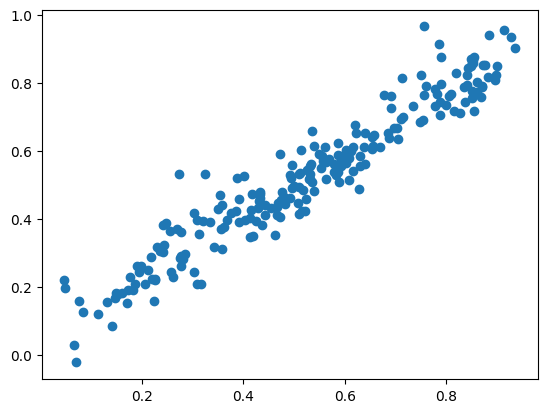

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9187426615078954

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9187426615078954

In [ ]:
### Adj r2

n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1- (1-r2)*(n-1)/((n-p-1))
adj_r2

0.910534849538996

In [ ]:
#### train data set and test data set R2 values are aligned and hence we can accept this model and make predictions out of this

In [ ]:
#### Calculate errors and check normality and homoscedaticity
